## Homework 3
**Due by Wednesday, July 26th at 3pm**
<br>
**Name: Nick Kern  **
<br>
**Date:   **

### Problem 1: The HR Diagram

The creation of the Hertzsprung-Russell (HR) diagram was a major step forward in the early 20th century in understanding the evolution and structure of stars. The HR diagram is a scatter plot of individual stars, with the x-axis tracking the stars' surface temperature, and the y-axis tracking the stars' total brightness. "Normal" stars in the early stages of their lives fall within a single band along the diagonal of the HR diagram called **the main sequence**. Stars that are more evolved lie off the main sequence, and depending on their evolutionary state, fall above or below the main sequence as Giants, Supergiants or White Dwarfs.

<img src="hrdiagram.png" width=450px/>

Check out the data in `stars.txt`. This file contains data on the *surface temperatures* and *absolute magnitudes* of nearby stars in our galaxy. The first column is the surface temperature of the star, and the second is its magnitude.

1.
**Make a scatter plot of the HR diagrm with the data in `stars.txt`** following the axes convention of the HR diagram. Note that in the standard HR diagram, the **temperature increases to the left**. You can flip the direction of an axis with the command `plt.gca().invert_xaxis()`. You'll also notice that typically the HR diagram is plotted in **log-space** rather than linear space on both the x and y axes. You can change the axes scaling with `ax.set_xscale` and `ax.set_yscale`.

The following is a checklist for your graph:
* label your axes and include units
* luminosity on y-axis, not magnitude
* temperature increases to the left
* plot is in log-space, not linear-space

To convert from absolute magnitude to luminosity use the following equation and invert it to find $L$ given $M_{\text{abs}}$:

\begin{align}
M_{\text{abs}} = 4.80 - 2.5\cdot\log_{10}\left(\frac{L}{L_\text{sun}}\right),
\end{align}
where $L_{\text{sun}} = 3.8\times10^{26}$ W is the luminosity of the Sun 

2.
**For the same plot, make each point have its own color depending on its temperature** (similar to example figure above). To do this, look at the `c` keyword-argument of the `ax.scatter()` function. Attach a colorbar to the right of the figure to inform the reader what temperature the colors correspond to (label it too!). You may consider changing the `alpha` parameter in `scatter()` to make the points easier to see.

3.
**On the same plot, overplot a single dot for the Sun's position** on the HR diagram. Give it an annotation labeling at as "Sun" using the `ax.annotate()` function. **Repeat this for three more of your favorite stars** (pick any three, plot a dot for them and label them)!

4.
If we know the luminosity and temperature of a star, we can derive its radius from the following equation

\begin{align}
L = 4\pi R^{2}\sigma T^{4},
\end{align}

where $\sigma = 5.67\times10^{-8}$ W m$^{-2}$ K$^{-4}$ is the Stefan-Boltzmann constant. Use this equation to derive the radius of each star in the dataset. Similar to the example figure, **overplot lines of constant radius** on your HR diagram for $R = [10^{-2}, 10^{-1}, 10^{0}, 10^{1}, 10^{2}]$ solar radii. Use `ax.annotate` to label each line which $R$ it corresponds to.

5.
**Answer the following questions**:

i. Which of the four stellar populations do you see in your HR diagram (based on the categories in the example image)?

ii. On average, do stars on the Main Sequence with smaller radii than the Sun have higher or lower surface temperatures (excluding White Dwarves)? 

iii. From your plot, make a rough estimate of the average radius for a White Dwarf. 

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# load data
temp, mag = np.loadtxt('stars.txt', unpack=True)

# constants
Lsun = 3.8e26 # watts
Rsun = 6.9e8 # meter

In [7]:
# convert to Lum
M2L = lambda M: Lsun * 10**(-0.4*(M-4.8))
lum = M2L(mag)

In [62]:
# lum function
def Luminosity(R, T):
    sig = 5.67e-8
    return 4*np.pi*R**2*sig*T**4

T_range = np.linspace(1e3, 1.8e4, 100)
R1 = Luminosity(.01*Rsun, T_range)
R2 = Luminosity(.1*Rsun, T_range)
R3 = Luminosity(1.*Rsun, T_range)
R4 = Luminosity(10.*Rsun, T_range)
R5 = Luminosity(100.*Rsun, T_range)

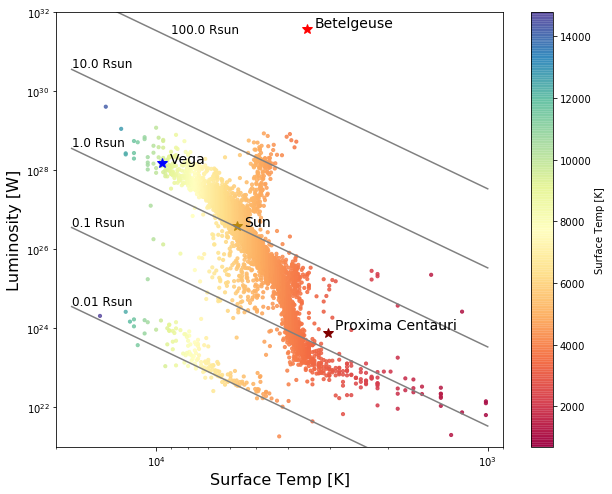

In [78]:
# plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)

# scatter
cax = ax.scatter(temp, lum, c=temp, cmap='Spectral', s=10, alpha=0.85)
ax.set_xscale('log')
ax.set_yscale('log')
plt.gca().invert_xaxis()
fig.colorbar(cax, label='Surface Temp [K]')

# label
ax.set_xlabel('Surface Temp [K]', fontsize=16)
ax.set_ylabel('Luminosity [W]', fontsize=16)
ax.set_xlim(20000, 900)
ax.set_ylim(1e21, 1e32)

# annotate
ax.plot([5700], [Lsun], marker='*', color='darkgoldenrod', markersize=10)
ax.annotate('Sun', xy=(5700*.95,Lsun*1.05), fontsize=14)
ax.plot([9600], [40.1*Lsun], marker='*', color='blue', markersize=10)
ax.annotate('Vega', xy=(9600*.95, 40.5*Lsun), fontsize=14)
ax.plot([3040], [.002*Lsun], marker='*', color='maroon', markersize=10)
ax.annotate('Proxima Centauri', xy=(3040*.95, .0025*Lsun), fontsize=14)
ax.plot([3500], [1e5*Lsun], marker='*', color='red', markersize=10)
ax.annotate('Betelgeuse', xy=(3500*.95, 1.1e5*Lsun), fontsize=14)

# plot lines of const radius
ax.plot(T_range, R1, color='grey')
ax.annotate('0.01 Rsun', xy=(1.8e4, 4e24), fontsize=12)
ax.plot(T_range, R2, color='grey')
ax.annotate('0.1 Rsun', xy=(1.8e4, 4e26), fontsize=12)
ax.plot(T_range, R3, color='grey')
ax.annotate('1.0 Rsun', xy=(1.8e4, 4e28), fontsize=12)
ax.plot(T_range, R4, color='grey')
ax.annotate('10.0 Rsun', xy=(1.8e4, 4e30), fontsize=12)
ax.plot(T_range, R5, color='grey')
ax.annotate('100.0 Rsun', xy=(.9e4, 3e31), fontsize=12)

i.
Using our plot as a guide, we can clearly make out the **Main Sequence** population. Branching off vertically from the MS we can see a population of **Giants**, and below the MS we can see a population of **White Dwarves**. We do not see a population of Super Giants, as those would lie around where Betelgeuse is located, and we have no data there.

ii.
We can see from our plot that for stars on the MS that have smaller radii, the trend-line of the MS dips to lower surface temperatures, meaning that on average, **stars with smaller radii than the Sun have lower Surface Temps**.


iii.
From our graph we can see that the White Dwarf population straddles the line of $0.01\ R_{sun}$. 


### Problem 2: Galaxy Cluster Scaling Laws

A galaxy cluster is just what you'd expect: a clustering of anywhere from a few dozen to hundreds of individual galaxies. Below is a picture of the galaxy cluster Abell_1689.

<img src="abell1689.jpg" width=400px/>
<center>An optical image of Abell 1689. Each object of the hazy objects are individual galaxies.</center>

Galaxy clusters are the most massive gravitationally-bound objects in the entire universe. Their matter content is known to be predominately made of dark matter, which is a form of matter we cannot see with any known technology. In other words, all of the individual galaxies in the image above make up only a fraction of the total mass the lies in the cluster. Galaxy clusters have been extensively studied observationally and theoretically. In this problem, we will utilize data from a high-resolution cosmological simulation of galaxy cluster formation in the universe, called the [Millennium Simulation](https://wwwmpa.mpa-garching.mpg.de/galform/virgo/millennium/). The dataset, `clusters.csv`, is a collection of some of the largest galaxy clusters that formed in the simulation. Each row in the file corresponds to an individual galaxy cluster.

1.
**Load in the data** from the `clusters.csv` file using the `np.loadtxt` function and **create an array called `mass`** that contains the natural logarithm of the `m200crit` column and **another called `vdisp`** that contains the natural logarithm of the `vdispmean` column. The former corresponds to the galaxy cluster's mass in units of $10^{10} M_{\rm{sun}}$, the latter is the cluster's velocity dispersion in units of km/sec.

2.
Make a scatter plot of the `vdisp` on the y-axis and `mass` on the x-axis. Label your axes appropriately and include units. What kind of relationship do you find between a cluster's mass and velocity dispersion? Note it is inherently in log-space because we took the natural log of the data.

3.
Use your plot to make a best-fit line by-eye, and then **over-plot the line** in your previous scatter plot. What is the **slope** of your best-fit line? What is the **y-axis value** of your best-fit line when the mass is $10^{15} M_{\rm{sun}}$?

There is a [classic paper](https://arxiv.org/pdf/astro-ph/0702241.pdf) in the Astrophysics literature, which did exactly what you've just done with a different set of simulations and found that galaxy clusters tend to obey a scaling law between mass and velocity dispersion in log-space with the following form

\begin{align}
\ln\sigma = \alpha\cdot\ln M_{200} + \ln\sigma_{\rm{norm}},
\end{align}

where $\sigma_{\rm{norm}}$ is the velocity dispersion in km/sec when mass $= 10^{15} M_{\rm{sun}}$, and where $M_{\rm{200}}$ is the cluster mass in units of $10^{15}M_{\rm{sun}}$ (see Equation 6 and Figure 2). For their best fit line, they find a slope of $\alpha \approx 0.336$, and they find $\sigma_{\rm{norm}} \approx 1082$ km/sec, which translates to $\ln\sigma_{\rm{norm}} \approx 6.9$ in log-space. Do the results of your best-fit line, which you fit to the results from a different set of cosmological simulations, roughly agree with their results?

In [6]:
# Load data
data = np.loadtxt('clusters.csv', delimiter=',', usecols=(6, 8))

mass = np.log(data[:, 0])
vdisp = np.log(data[:, 1])

In [50]:
# Best-fit Line
y = lambda x: 0.35*x + 2.92
xrange = np.linspace(9, 11.5)

# print y-value when x=11.5
y(11.5)

6.944999999999999

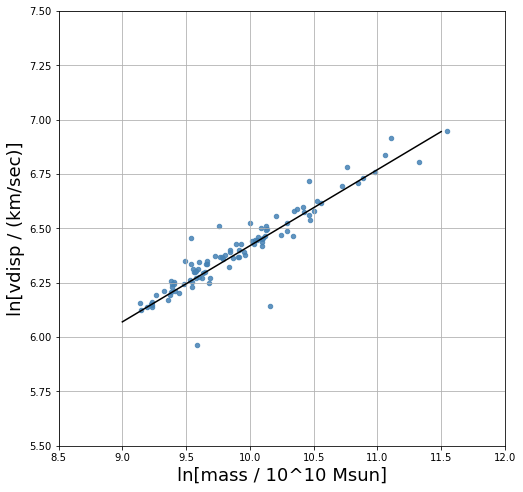

In [49]:
# plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

# scatter
ax.scatter(mass, vdisp, s=20, color='steelblue', alpha=0.85)

# labels
ax.set_xlabel('ln[mass / 10^10 Msun]', fontsize=18)
ax.set_ylabel('ln[vdisp / (km/sec)]', fontsize=18)
ax.set_xlim(8.5, 12)
ax.set_ylim(5.5, 7.5)
ax.grid(True)

# best-fit
ax.plot(xrange, y(xrange), color='k')


In plotting the scaling relationship between `ln[mass]` and `ln[vdisp]`, we find a linear relationship in log-space. This means that the two are related via a power law, whose exponent is the slope of the line in log-space.

The **slope of our best-fit line is 0.35** and the y-value of our best-fit line when `mass`=$10^{15}\ M_{sun}$ or `ln[mass]`$=11.5$ is **`ln[vdisp]` = 6.95**, or **`vdisp` = 1045 km/sec**. This is in excellent agreement with the Evrard et al. 2007 study linked above.

### Problem 3: Numerical Integration
Excersize 5.3 from Newman

The following integral 

\begin{align}
E(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x}e^{-t^{2}}dt
\end{align}

cannot be done analytically (i.e., by-hand) and therefore must be done numerically. It also has a special name: the *Error Function*!

1.
Write a function, `E(x)`, that calculates the value of $E(x)$ given a value of `x` using the trapezoidal rule for integration. Make a plot of $E(x)$ for $0 < x < 5$ in steps of $dx = 0.1$.

You can check your function is returning accurate answers by comparing to the following values of $E(x)$ solved for using more precise numerical integration schemes. Use these to check that your function is accurate to at least five significant figures.

\begin{align}
E(0.5) &= 0.520499877 \\
E(1.0) &= 0.842700792 \\
E(1.5) &=  0.966105146
\end{align}

2.
What is (roughly) the minimum number of slices you can use to achieve that level of accuracy?


In [73]:
def trap_int(func, a, b, N=1000):
    """
    trapezoidal integration solver
    """
    # bin width
    h = (b-a)/float(N)
    
    # get x-values
    x_range = np.linspace(a, b, N+1)
    
    # get y-values
    y_range = func(x_range)
    
    # evaluate trapezoidal sum
    I = h*(0.5*y_range[0] + 0.5*y_range[-1] + sum(y_range[1:-1]))
    
    return I

In [74]:
def E(x, N=1000):
    """
    Error Function
    """
    # Define Integrand
    def func(t):
        return np.exp(-t**2)
    
    # Integrate
    I = trap_int(func, 0, x, N=N)
    
    # multiply by constants
    result = 2*I/np.sqrt(np.pi)
    
    return result

In [75]:
# generate x-range
x_values = np.arange(0,5,0.1)

# generate y-value
y_values = np.array(list(map(E, x_values)))

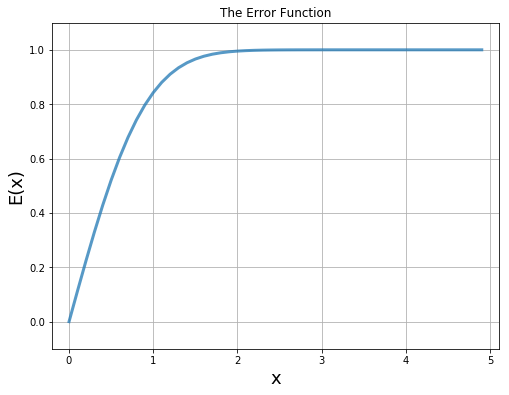

In [80]:
# plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

# lineplot
ax.plot(x_values, y_values, linestyle='-', marker='', linewidth=3, alpha=0.75)
ax.grid(True)

# labels
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('E(x)', fontsize=18)
ax.set_xlim(-0.2, 5.1)
ax.set_ylim(-.1, 1.1)
ax.set_title('The Error Function')

In [115]:
# Precision Check
E1 = 0.520499877
E2 = 0.842700792
E3 = 0.966105146

# Define N
N1 = 75
N2 = 100
N3 = 100

# Evaluate Trap rule
E1_trap = E(0.5, N=N1)
E2_trap = E(1.0, N=N2)
E3_trap = E(1.5, N=N3)

# Print Accuracy
print("E(0.5) accurate to {:.8f} with {:d} slices".format((E1-E1_trap), N1))
print("E(1.0) accurate to {:.8f} with {:d} slices".format((E2-E2_trap), N2))
print("E(1.5) accurate to {:.8f} with {:d} slices".format((E3-E3_trap), N3))

E(0.5) accurate to 0.00000325 with 75 slices
E(1.0) accurate to 0.00000692 with 100 slices
E(1.5) accurate to 0.00000669 with 100 slices
